### Run feature information

In [2]:
import pandas as pd

In [3]:
data_info = pd.read_csv('DATA/lending_club_info.csv', index_col='LoanStatNew')

In [4]:
#access rows by the values in the LoanStatNew column directly using .loc[]
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [5]:
#def feat_info(col_name):
#   print(data_info.loc[col_name]['Description'])
feat_info = lambda col_name: print(data_info.loc[col_name]['Description'])

In [6]:
feat_info('mort_acc')

Number of mortgage accounts.


### Loading dataset and libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
df = pd.read_csv('DATA/lending_club_loan_two.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [10]:
df.shape

(396030, 27)

### Exploratory Data Analysis

<Axes: xlabel='loan_status', ylabel='count'>

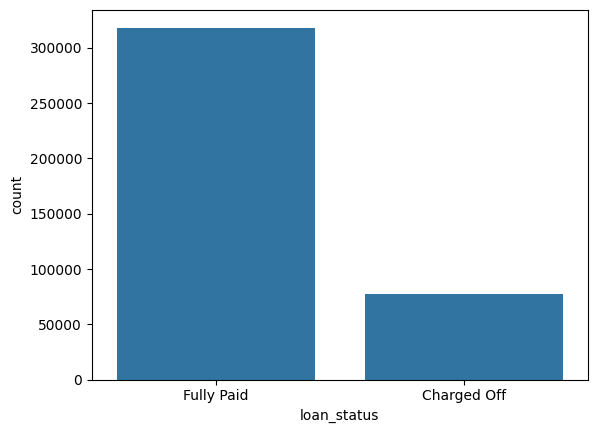

In [11]:
#general countplot to see the loan status
sns.countplot(x='loan_status',data=df)

C:\Users\RASICA\AppData\Local\Temp\ipykernel_16692\3813125600.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'],kde=False, bins=40)


<Axes: xlabel='loan_amnt'>

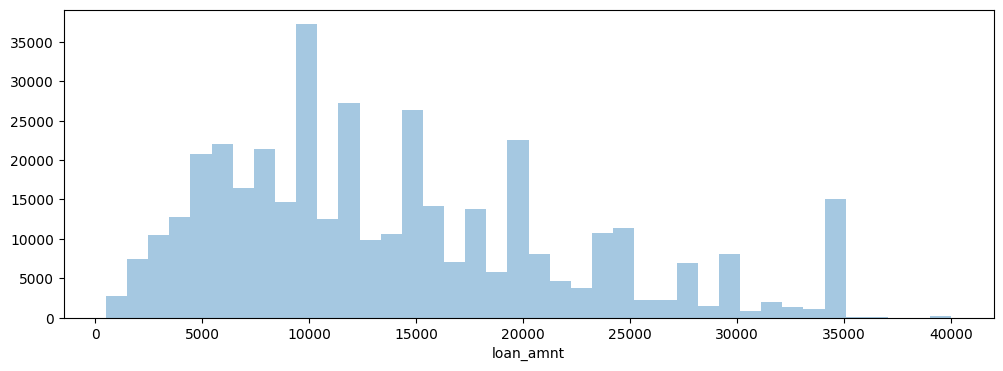

In [12]:
#Creating histogram of the loan amount
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False, bins=40)

In [13]:
correlation_matrix = df.select_dtypes(include='float64').corr()
print(correlation_matrix)

                      loan_amnt  int_rate  installment  annual_inc       dti  \
loan_amnt              1.000000  0.168921     0.953929    0.336887  0.016636   
int_rate               0.168921  1.000000     0.162758   -0.056771  0.079038   
installment            0.953929  0.162758     1.000000    0.330381  0.015786   
annual_inc             0.336887 -0.056771     0.330381    1.000000 -0.081685   
dti                    0.016636  0.079038     0.015786   -0.081685  1.000000   
open_acc               0.198556  0.011649     0.188973    0.136150  0.136181   
pub_rec               -0.077779  0.060986    -0.067892   -0.013720 -0.017639   
revol_bal              0.328320 -0.011280     0.316455    0.299773  0.063571   
revol_util             0.099911  0.293659     0.123915    0.027871  0.088375   
total_acc              0.223886 -0.036404     0.202430    0.193023  0.102128   
mort_acc               0.222315 -0.082583     0.193694    0.236320 -0.025439   
pub_rec_bankruptcies  -0.106539  0.05745

<Axes: >

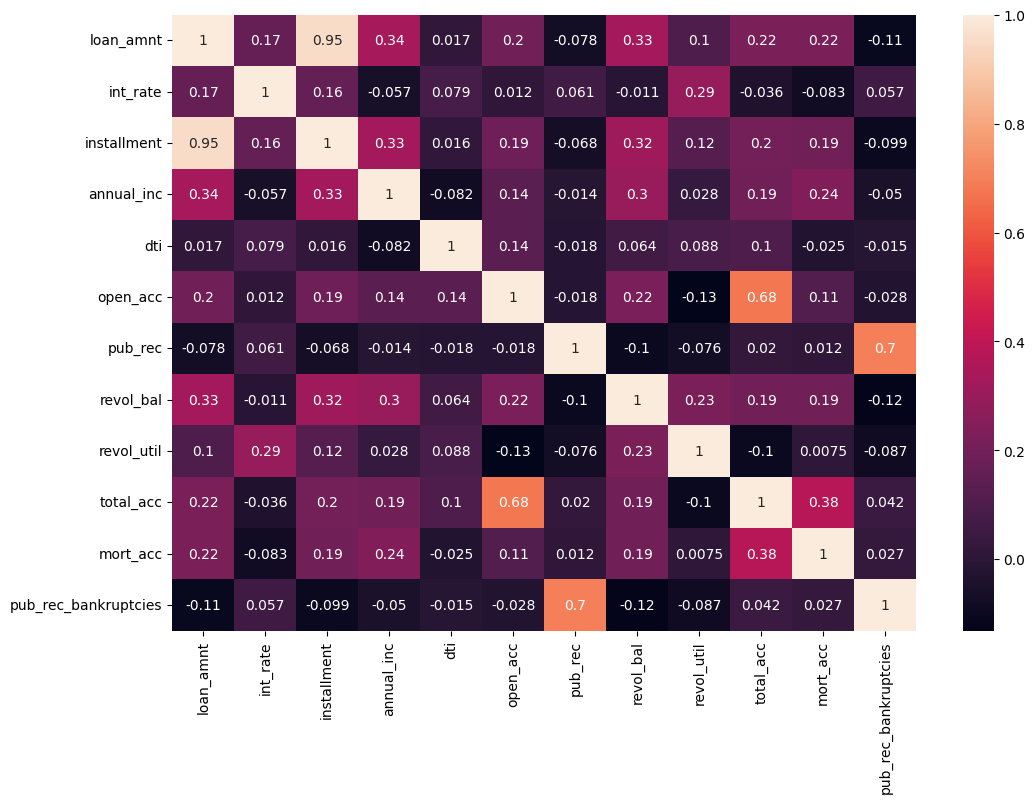

In [14]:
#Visualizing correlation using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True)

##### Description of Features

In [15]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [16]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

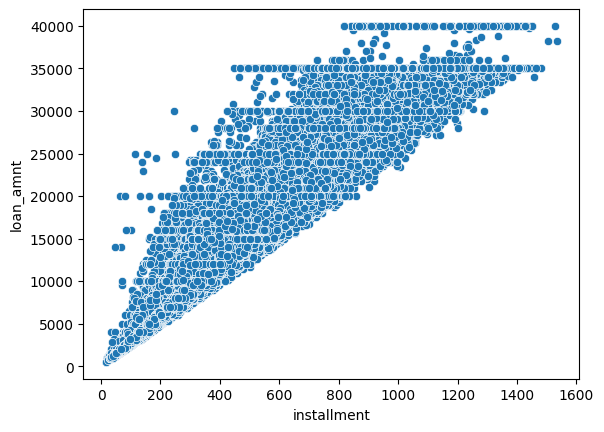

In [17]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

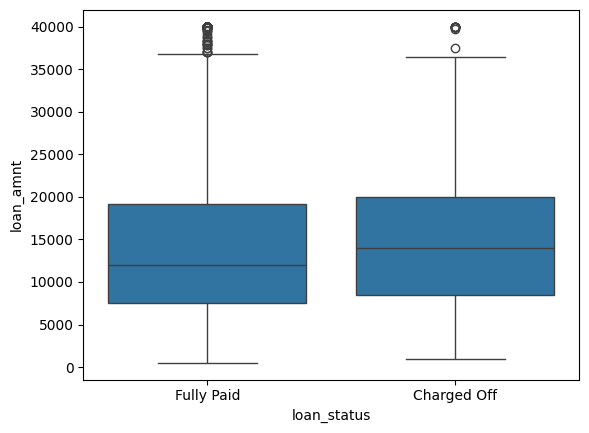

In [18]:
#Boxplot to show relationship between loan amount and loan status
sns.boxplot(data = df,x='loan_status',y='loan_amnt')

In [19]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [20]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [21]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<Axes: xlabel='grade', ylabel='count'>

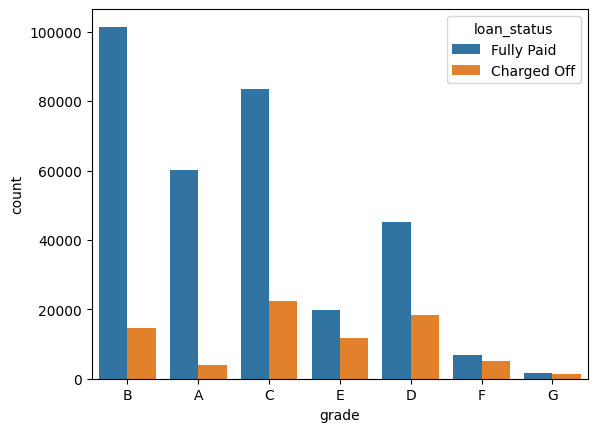

In [22]:
sns.countplot(x='grade', data=df, hue='loan_status')

C:\Users\RASICA\AppData\Local\Temp\ipykernel_16692\1801404931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sub_grade',data=df, order=subgrade_order, palette='coolwarm')


<Axes: xlabel='sub_grade', ylabel='count'>

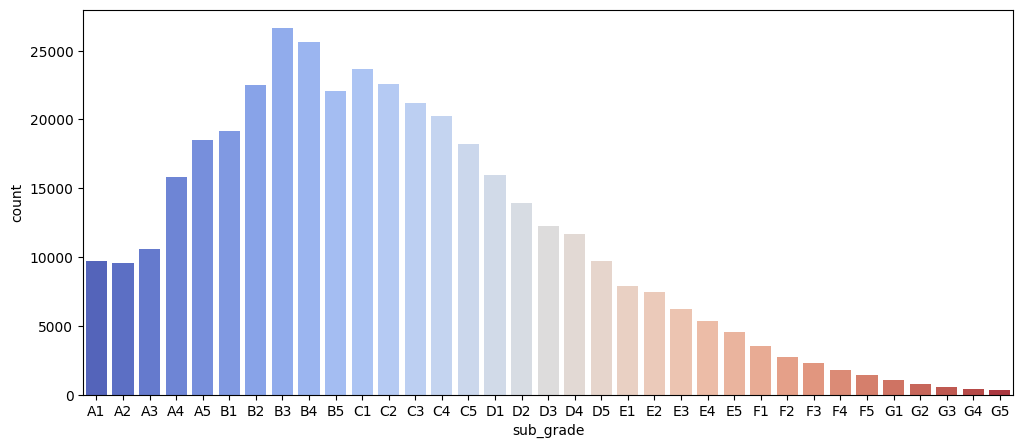

In [23]:
plt.figure(figsize=(12,5))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df, order=subgrade_order, palette='coolwarm')

<Axes: xlabel='sub_grade', ylabel='count'>

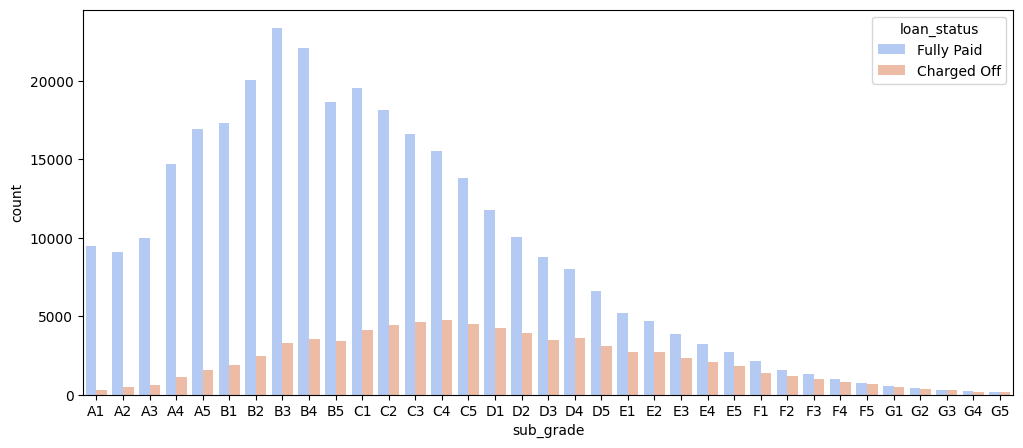

In [24]:
plt.figure(figsize=(12,5))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df, order=subgrade_order, palette='coolwarm', hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

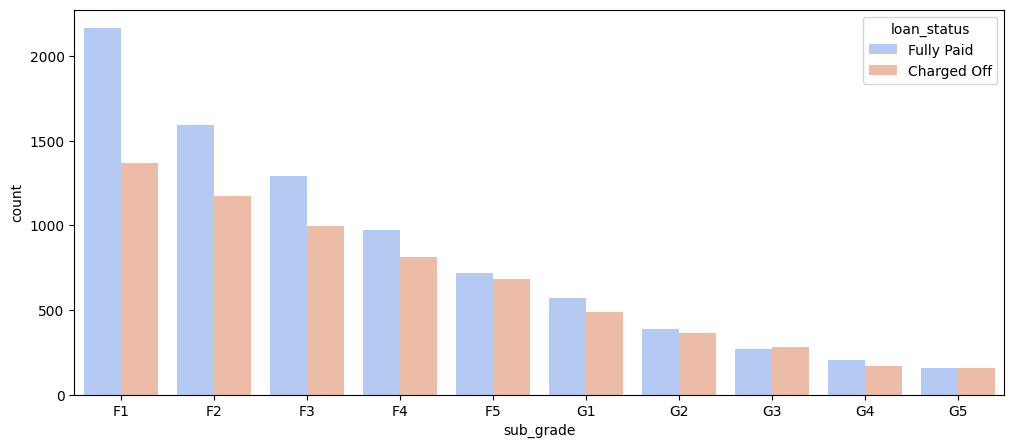

In [25]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,5))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g, order=subgrade_order, palette='coolwarm', hue='loan_status')

In [26]:
#Creating a new column called loan_repaid which will contain a 1 if the loan status is fully paid and 0 if not.

In [27]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [28]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [29]:
#Visualizing which features have the highest correlation
float_df = df.select_dtypes(include=['float64'])
float_df = pd.concat([float_df, df['loan_repaid']], axis=1)

<Axes: >

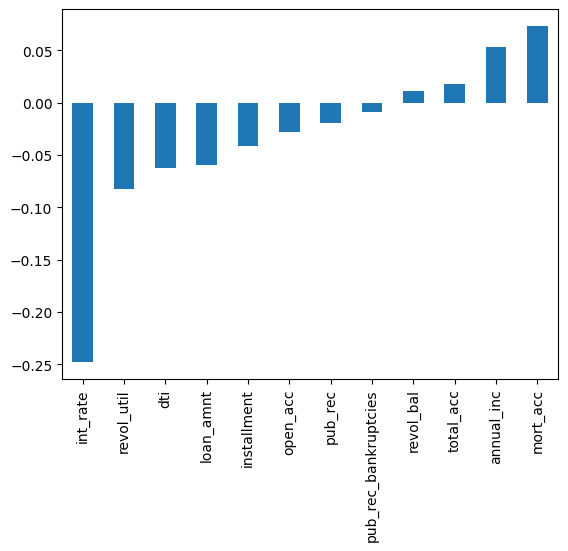

In [30]:
float_df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

### Data Preprocessing

In [31]:
df.shape

(396030, 28)

In [32]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [33]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [34]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [35]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [37]:
df['emp_title'].nunique()

173105

In [39]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [40]:
df = df.drop('emp_title',axis=1)

In [42]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [43]:
emp_length_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

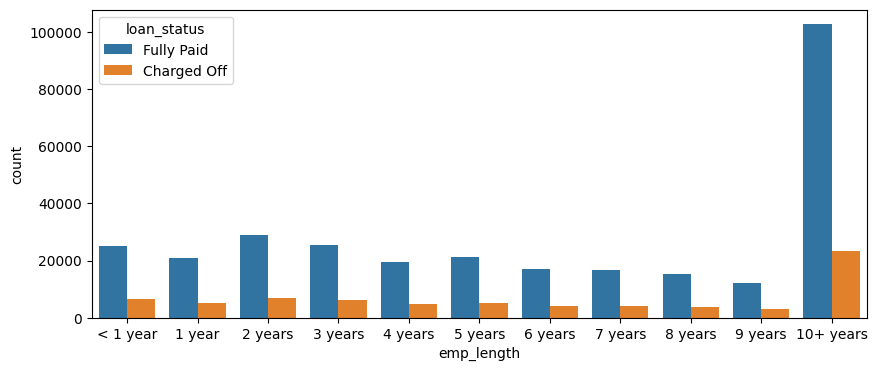

In [47]:
plt.figure(figsize=(10,4))
sns.countplot(x='emp_length', data=df, order=emp_length_order, hue='loan_status')

In [58]:
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [59]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [65]:
emp_len = (emp_co/(emp_co+emp_fp))*100

<Axes: xlabel='emp_length'>

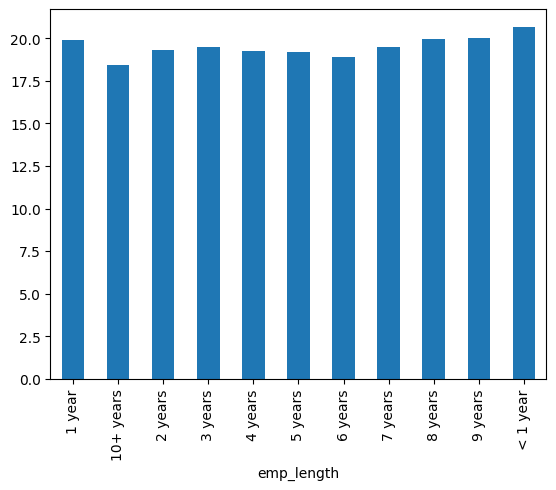

In [66]:
emp_len.plot(kind='bar')

In [67]:
df = df.drop('emp_length', axis=1)

In [68]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [70]:
df = df.drop('title', axis=1)

In [73]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [75]:
#find correlation with mortage account
float_df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [76]:
# group the dataframe by total account and calculate the mean value for the mortage account per total account entry.

In [81]:
total_acc_avg = float_df.groupby('total_acc').mean()['mort_acc']

In [82]:
#Filling the missing data

In [84]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [86]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [88]:
df = df.dropna()

df.isnull().sum()

### Dealing with Categorical or Dummy variables

In [90]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [91]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [96]:
df['term'].value_counts()

term
36 months    301247
60 months     93972
Name: count, dtype: int64

In [99]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

C:\Users\RASICA\AppData\Local\Temp\ipykernel_16692\2179920926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['term'] = df['term'].apply(lambda term: int(term[:3]))


In [100]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [101]:
#dropping grade feature since we already have sub grade feature
df = df.drop('grade', axis=1)

In [103]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [105]:
df.columns #sub grades

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [107]:
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status','purpose']],drop_first=True)
df = pd.concat([df.drop(['verification_status', 'application_type', 'initial_list_status','purpose'],axis=1),dummies],axis=1)

In [110]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [109]:
#categorizing NONE and ANY in OTHER
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [111]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [112]:
#Feature Engineering Zipcodes
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [113]:
df['zip_code'].value_counts()

zip_code
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

In [114]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [115]:
df = df.drop('address', axis=1)

In [116]:
feat_info('issue_d')

The month which the loan was funded


In [117]:
df = df.drop('issue_d',axis=1)

In [118]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [122]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [124]:
df['earliest_cr_line'].value_counts()

earliest_cr_line
2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: count, Length: 65, dtype: int64

### Model training 

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
df = df.drop('loan_status', axis=1)

In [128]:
X = df.drop('loan_repaid', axis=1).values

In [130]:
y = df['loan_repaid'].values

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [132]:
from sklearn.preprocessing import MinMaxScaler

In [133]:
scaler = MinMaxScaler()

In [134]:
X_train = scaler.fit_transform(X_train)

In [136]:
#only transform to avoid data leakage
X_test = scaler.transform(X_test)

In [138]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [139]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [140]:
X_train.shape

(316175, 78)

In [142]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256,validation_data=(X_test,y_test) )

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3566 - val_loss: 0.2658
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2673 - val_loss: 0.2630
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2635 - val_loss: 0.2623
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2628 - val_loss: 0.2622
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2612 - val_loss: 0.2626
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2601 - val_loss: 0.2613
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2617 - val_loss: 0.2619
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2597 - val_loss: 0.2612
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2587 - val_loss: 0.2615
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2589 - val_loss: 0.2612
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2574 - val_loss: 0.2619
Epoch 12/25
1236/1236 ━━━━━━━━

### Evaluating model performance

In [144]:
losses = pd.DataFrame(model.history.history)

<Axes: >

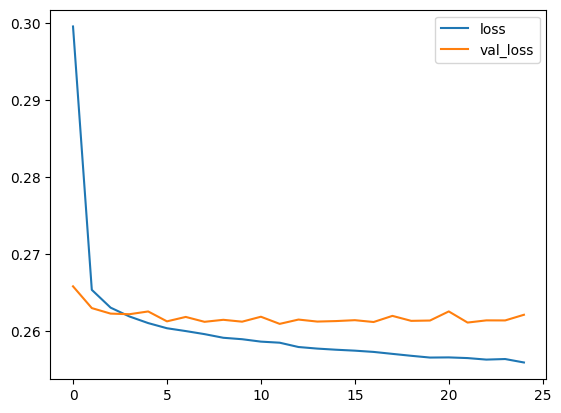

In [145]:
losses.plot()

In [146]:
#creating predictions from the X_test set and display a classification report and confusion matrix for the X_test set

In [147]:
from sklearn.metrics import classification_report,confusion_matrix

In [152]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 2s 763us/step


In [153]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [154]:
confusion_matrix(y_test,predictions)

array([[ 6771,  8887],
       [   34, 63352]], dtype=int64)

In [155]:
#random customer generator for loan

import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.0
term                60
int_rate         18.24
installment     638.11
annual_inc     61665.0
                ...   
30723             True
48052            False
70466            False
86630            False
93700            False
Name: 305323, Length: 78, dtype: object

In [156]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [162]:
prediction = (model.predict(new_customer) > 0.5).astype("int32")
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[1]]
